In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()


import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Todos los resultados se guardan en el directorio actual.

import warnings
warnings.filterwarnings('ignore')
print("\n No se muestran Warning")
#warnings.filterwarnings('always')
#print("\n Se muestran Warnings")

../input\aisles.csv
../input\departments.csv
../input\kaggle_instakart_jcv.db
../input\orders.csv
../input\order_products__prior.csv
../input\order_products__train.csv
../input\products.csv

 No se muestran Warning


In [2]:
#Cargo los archivos a dataframes
aisles = pd.read_csv('../input/aisles.csv')
departments = pd.read_csv('../input/departments.csv')
order_products_prior = pd.read_csv('../input/order_products__prior.csv')
order_products_train = pd.read_csv('../input/order_products__train.csv')
orders = pd.read_csv('../input/orders.csv')
products = pd.read_csv('../input/products.csv')
print("Listo!")

Listo!


In [3]:
# Combino order_productos_prior con products, aisles, departments y orders
order_products_prior = pd.merge(order_products_prior, products, on='product_id', how='left')
order_products_prior = pd.merge(order_products_prior, aisles, on='aisle_id', how='left')
order_products_prior = pd.merge(order_products_prior, departments, on='department_id', how='left')
order_products_prior = pd.merge(order_products_prior, orders, on='order_id', how='left')
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [4]:
# Combino order_productos_train con products, aisles, departments y orders
order_products_train = pd.merge(order_products_train, products, on='product_id', how='left')
order_products_train = pd.merge(order_products_train, aisles, on='aisle_id', how='left')
order_products_train = pd.merge(order_products_train, departments, on='department_id', how='left')
order_products_train = pd.merge(order_products_train, orders, on='order_id', how='left')
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9.0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,112108,train,4,4,10,9.0
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,train,4,4,10,9.0


In [5]:
# Chequeo que las columnas son exactamente las mismas
a, b = order_products_prior.columns, order_products_train.columns
print(a, "\n" ,b)
set(a).intersection(b)
len(a) == len(b)

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'aisle', 'department',
       'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object') 
 Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'aisle', 'department',
       'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')


True

In [6]:
# Comprobando si el dataframe tiene filas que pertenecen al conjunto de prueba
#'test' en order_products_prior.eval_set

In [7]:
# Comprobando si el dataframe tiene filas que pertenecen al conjunto de prueba
#'test' en order_products_train.eval_set

In [8]:
# Reorganizar el orden de las columnas según sus preferencias
order_products_prior = order_products_prior[['user_id', 'order_number', 'add_to_cart_order', 'order_id', 'product_id', 'aisle_id', 
                                             'product_name','department_id', 'aisle', 'department','add_to_cart_order', 'reordered', 
                                             'eval_set', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']]
order_products_train = order_products_train[['user_id', 'order_number', 'add_to_cart_order', 'order_id', 'product_id', 'aisle_id', 
                                             'product_name','department_id', 'aisle', 'department','add_to_cart_order', 'reordered', 
                                             'eval_set', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']]

In [9]:
#order_products_prior = order_products_prior.sort_values(by =['user_id', 'order_number']).reset_index()

In [10]:
#order_products_train = order_products_train.sort_values(by =['user_id', 'order_number']).reset_index()
#order_products_train.head(10)

In [11]:
#Número total de pedidos realizados por cada usuario
users = order_products_prior.groupby(by='user_id')['order_number'].aggregate('max').to_frame('u_num_of_orders').reset_index()

In [12]:
users.head()

,user_id,u_num_of_orders
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4


In [13]:
# Promedio de productos comprados por el usuario en cada compra.
#1. Primero obteniendo el número total de productos en cada pedido.
total_prd_per_order = order_products_prior.groupby(by=['user_id', 'order_id'])['product_id'].aggregate('count').to_frame('total_products_per_order').reset_index()
total_prd_per_order.head(10)

,user_id,order_id,total_products_per_order
0,1,431534,8
1,1,473747,5
2,1,550135,5
3,1,2254736,5
4,1,2295261,6
5,1,2398795,6
6,1,2539329,5
7,1,2550362,9
8,1,3108588,6
9,1,3367565,4


In [14]:
#2. Obtener el promedio de productos comprados por cada usuario
avg_products = total_prd_per_order.groupby(by=['user_id'])['total_products_per_order'].mean().to_frame('u_avg_prd').reset_index()
avg_products.head()

,user_id,u_avg_prd
0,1,5.900000
1,2,13.928571
2,3,7.333333
3,4,3.600000
4,5,9.250000


In [15]:
#borro el dataframe total_prd_per_order 
del total_prd_per_order

In [16]:
#dow de la mayoría de los pedidos realizados por cada usuario
from scipy import stats
dow = order_products_prior.groupby(by='user_id')['order_dow'].agg(lambda x: pd.Series.mode(x)[0]).to_frame('dow_most_orders_u').reset_index()
dow.head(5)

,user_id,dow_most_orders_u
0,1,4
1,2,2
2,3,0
3,4,4
4,5,3


In [17]:
#hora del día en que cada usuario realiza la mayoría de los pedidos
from scipy import stats
#hod = order_products_prior.groupby(by='user_id')['order_hour_of_day'].agg(lambda x: stats.mode(x)[0]).to_frame('hod_most_orders_u').reset_index()
hod = order_products_prior.groupby(by='user_id')['order_hour_of_day'].agg(lambda x: pd.Series.mode(x)[0]).to_frame('hod_most_orders_u').reset_index()
hod.head()

,user_id,hod_most_orders_u
0,1,7
1,2,9
2,3,16
3,4,15
4,5,18


In [18]:
#merging las funciones creadas por el usuario.

#1. fusionando avg_products con usuarios
users = users.merge(avg_products, on='user_id', how='left')
#borrando avg_products
del avg_products
users.head()

,user_id,u_num_of_orders,u_avg_prd
0,1,10,5.900000
1,2,14,13.928571
2,3,12,7.333333
3,4,5,3.600000
4,5,4,9.250000


In [19]:
#2. fusionando dow con users.
users = users.merge(dow, on='user_id', how='left')
#borrando dow
del dow
users.head()

,user_id,u_num_of_orders,u_avg_prd,dow_most_orders_u
0,1,10,5.900000,4
1,2,14,13.928571,2
2,3,12,7.333333,0
3,4,5,3.600000,4
4,5,4,9.250000,3


In [20]:
#3. fusiono hod con users
users = users.merge(hod, on='user_id', how='left')
#borro hod
del hod
users.head()

,user_id,u_num_of_orders,u_avg_prd,dow_most_orders_u,hod_most_orders_u
0,1,10,5.900000,4,7
1,2,14,13.928571,2,9
2,3,12,7.333333,0,16
3,4,5,3.600000,4,15
4,5,4,9.250000,3,18


In [21]:
#número de veces que se compró un producto.
prd = order_products_prior.groupby(by='product_id')['order_id'].agg('count').to_frame('prd_count_p').reset_index()
prd.head()

,product_id,prd_count_p
0,1,1852
1,2,90
2,3,277
3,4,329
4,5,15


In [22]:
#relación de reorden de productos.
reorder_p = order_products_prior.groupby(by='product_id')['reordered'].agg('mean').to_frame('p_reordered_ratio').reset_index()
reorder_p.head()

,product_id,p_reordered_ratio
0,1,0.613391
1,2,0.133333
2,3,0.732852
3,4,0.446809
4,5,0.600000


In [23]:
#fusiono reorder_p con prd
prd = prd.merge(reorder_p, on='product_id', how='left')
#borro reorder_p
del reorder_p
prd.head()

,product_id,prd_count_p,p_reordered_ratio
0,1,1852,0.613391
1,2,90,0.133333
2,3,277,0.732852
3,4,329,0.446809
4,5,15,0.600000


In [24]:
#cuantas veces un usuario compro el mismo producto.
uxp = order_products_prior.groupby(by=['user_id', 'product_id'])['order_id'].agg('count').to_frame('uxp_times_bought').reset_index()
uxp.head()

,user_id,product_id,uxp_times_bought
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3


In [25]:
#relación de reorden del usuario para cada producto.
reorder_uxp = order_products_prior.groupby(by=['user_id', 'product_id'])['reordered'].agg('mean').to_frame('uxp_reordered_ratio').reset_index()
reorder_uxp.head()

,user_id,product_id,uxp_reordered_ratio
0,1,196,0.900000
1,1,10258,0.888889
2,1,10326,0.000000
3,1,12427,0.900000
4,1,13032,0.666667


In [26]:
#fusiono los dos dataframe en uno
uxp = uxp.merge(reorder_uxp, on=['user_id', 'product_id'], how='left')
#borro reorder_uxp
del reorder_uxp
uxp.head()

,user_id,product_id,uxp_times_bought,uxp_reordered_ratio
0,1,196,10,0.900000
1,1,10258,9,0.888889
2,1,10326,1,0.000000
3,1,12427,10,0.900000
4,1,13032,3,0.666667


In [27]:
#fusiono users df en uxp
data = uxp.merge(users, on='user_id', how='left')
data.head()

,user_id,product_id,uxp_times_bought,uxp_reordered_ratio,u_num_of_orders,u_avg_prd,dow_most_orders_u,hod_most_orders_u
0,1,196,10,0.900000,10,5.9,4,7
1,1,10258,9,0.888889,10,5.9,4,7
2,1,10326,1,0.000000,10,5.9,4,7
3,1,12427,10,0.900000,10,5.9,4,7
4,1,13032,3,0.666667,10,5.9,4,7


In [28]:
#fusiono el dataframe products en data
data = data.merge(prd, on='product_id', how='left')
data.head()

,user_id,product_id,uxp_times_bought,uxp_reordered_ratio,u_num_of_orders,u_avg_prd,dow_most_orders_u,hod_most_orders_u,prd_count_p,p_reordered_ratio
0,1,196,10,0.900000,10,5.9,4,7,35791,0.776480
1,1,10258,9,0.888889,10,5.9,4,7,1946,0.713772
2,1,10326,1,0.000000,10,5.9,4,7,5526,0.652009
3,1,12427,10,0.900000,10,5.9,4,7,6476,0.740735
4,1,13032,3,0.666667,10,5.9,4,7,3751,0.657158


In [29]:
#borro dataframes no usados
del [users, prd, uxp]

In [30]:
#Me quedo solo con el conjunto de entrenamiento y prueba del dataframe de pedidos.
order_future = orders.loc[((orders.eval_set == 'train') | (orders.eval_set == 'test')), ['user_id', 'eval_set', 'order_id']]
order_future.head()

,user_id,eval_set,order_id
10,1,train,1187899
25,2,train,1492625
38,3,test,2774568
44,4,test,329954
49,5,train,2196797


In [31]:
#fusiono order_future con el df data.
data = data.merge(order_future, on='user_id', how='left')
data.head()

,user_id,product_id,uxp_times_bought,uxp_reordered_ratio,u_num_of_orders,u_avg_prd,dow_most_orders_u,hod_most_orders_u,prd_count_p,p_reordered_ratio,eval_set,order_id
0,1,196,10,0.900000,10,5.9,4,7,35791,0.776480,train,1187899
1,1,10258,9,0.888889,10,5.9,4,7,1946,0.713772,train,1187899
2,1,10326,1,0.000000,10,5.9,4,7,5526,0.652009,train,1187899
3,1,12427,10,0.900000,10,5.9,4,7,6476,0.740735,train,1187899
4,1,13032,3,0.666667,10,5.9,4,7,3751,0.657158,train,1187899


In [32]:
#preparo el df de entrenamiento
data_train = data[data.eval_set == 'train']
data_train.head()

,user_id,product_id,uxp_times_bought,uxp_reordered_ratio,u_num_of_orders,u_avg_prd,dow_most_orders_u,hod_most_orders_u,prd_count_p,p_reordered_ratio,eval_set,order_id
0,1,196,10,0.900000,10,5.9,4,7,35791,0.776480,train,1187899
1,1,10258,9,0.888889,10,5.9,4,7,1946,0.713772,train,1187899
2,1,10326,1,0.000000,10,5.9,4,7,5526,0.652009,train,1187899
3,1,12427,10,0.900000,10,5.9,4,7,6476,0.740735,train,1187899
4,1,13032,3,0.666667,10,5.9,4,7,3751,0.657158,train,1187899


In [33]:
#fusiono la información de order_products_train en data_train
data_train = data_train.merge(order_products_train[['product_id', 'order_id', 'reordered']], on=['product_id', 'order_id'], how='left')
data_train.head()

,user_id,product_id,uxp_times_bought,uxp_reordered_ratio,u_num_of_orders,u_avg_prd,dow_most_orders_u,hod_most_orders_u,prd_count_p,p_reordered_ratio,eval_set,order_id,reordered
0,1,196,10,0.900000,10,5.9,4,7,35791,0.776480,train,1187899,1.0
1,1,10258,9,0.888889,10,5.9,4,7,1946,0.713772,train,1187899,1.0
2,1,10326,1,0.000000,10,5.9,4,7,5526,0.652009,train,1187899,NaN
3,1,12427,10,0.900000,10,5.9,4,7,6476,0.740735,train,1187899,NaN
4,1,13032,3,0.666667,10,5.9,4,7,3751,0.657158,train,1187899,1.0


In [34]:
#llenando los valores NAN
data_train.reordered.fillna(0, inplace=True)

In [35]:
#colocando user_id y product_id como indices
data_train = data_train.set_index(['user_id', 'product_id'])

In [36]:
#borro las columnas eval_set, order_id que no son necesarias para entrenamiento
data_train.drop(['eval_set', 'order_id'], axis=1, inplace=True)

In [37]:
data_train.head()

uxp_times_bought  uxp_reordered_ratio  u_num_of_orders  \
user_id product_id                                                           
1       196                       10             0.900000               10   
        10258                      9             0.888889               10   
        10326                      1             0.000000               10   
        12427                     10             0.900000               10   
        13032                      3             0.666667               10   

                    u_avg_prd  dow_most_orders_u  hod_most_orders_u  \
user_id product_id                                                    
1       196               5.9                  4                  7   
        10258             5.9                  4                  7   
        10326             5.9                  4                  7   
        12427             5.9                  4                  7   
        13032             5.9                  4                  7   

                    prd_count_p  p_reordered_ratio  reordered  
user_id product_id                                             
1       196               35791           0.776480        1.0  
        10258              1946           0.713772        1.0  
        10326              5526           0.652009        0.0  
        12427              6476           0.740735        0.0  
        13032              3751           0.657158        1.0

In [38]:
#preparo el dataset de test.
data_test = data[data.eval_set == 'test']
data_test.head()

,user_id,product_id,uxp_times_bought,uxp_reordered_ratio,u_num_of_orders,u_avg_prd,dow_most_orders_u,hod_most_orders_u,prd_count_p,p_reordered_ratio,eval_set,order_id
120,3,248,1,0.000000,12,7.333333,0,16,6371,0.400251,test,2774568
121,3,1005,1,0.000000,12,7.333333,0,16,463,0.440605,test,2774568
122,3,1819,3,0.666667,12,7.333333,0,16,2424,0.492162,test,2774568
123,3,7503,1,0.000000,12,7.333333,0,16,12474,0.553551,test,2774568
124,3,8021,1,0.000000,12,7.333333,0,16,27864,0.591157,test,2774568


In [39]:
#borro las columnas innecesarias
data_test.drop(['eval_set', 'order_id'], axis=1, inplace=True)

In [40]:
#coloco  user_id y product_id como indice.
data_test = data_test.set_index(['user_id', 'product_id'])

In [41]:
data_test.head()

uxp_times_bought  uxp_reordered_ratio  u_num_of_orders  \
user_id product_id                                                           
3       248                        1             0.000000               12   
        1005                       1             0.000000               12   
        1819                       3             0.666667               12   
        7503                       1             0.000000               12   
        8021                       1             0.000000               12   

                    u_avg_prd  dow_most_orders_u  hod_most_orders_u  \
user_id product_id                                                    
3       248          7.333333                  0                 16   
        1005         7.333333                  0                 16   
        1819         7.333333                  0                 16   
        7503         7.333333                  0                 16   
        8021         7.333333                  0                 16   

                    prd_count_p  p_reordered_ratio  
user_id product_id                                  
3       248                6371           0.400251  
        1005                463           0.440605  
        1819               2424           0.492162  
        7503              12474           0.553551  
        8021              27864           0.591157

In [42]:
#borrando df ya no usados
del [aisles, departments, order_products_prior, order_products_train, orders, order_future, data] 

In [43]:
#reseteo indices
data_train.reset_index(inplace=True)
data_test.reset_index(inplace=True)

In [44]:
data_train.head()

,user_id,product_id,uxp_times_bought,uxp_reordered_ratio,u_num_of_orders,u_avg_prd,dow_most_orders_u,hod_most_orders_u,prd_count_p,p_reordered_ratio,reordered
0,1,196,10,0.900000,10,5.9,4,7,35791,0.776480,1.0
1,1,10258,9,0.888889,10,5.9,4,7,1946,0.713772,1.0
2,1,10326,1,0.000000,10,5.9,4,7,5526,0.652009,0.0
3,1,12427,10,0.900000,10,5.9,4,7,6476,0.740735,0.0
4,1,13032,3,0.666667,10,5.9,4,7,3751,0.657158,1.0


In [45]:
#fusión de los id de pasillos y departamentos con los datos de entrenamiento y test
data_train = data_train.merge(products[['product_id', 'aisle_id']], on='product_id', how='left')
data_test = data_test.merge(products[['product_id', 'aisle_id']], on='product_id', how='left')

In [46]:
#departmentos
data_train = data_train.merge(products[['product_id', 'department_id']], on='product_id', how='left')
data_test = data_test.merge(products[['product_id', 'department_id']], on='product_id', how='left')

In [47]:
#coloco user_id y product_id como indice.
data_test = data_test.set_index(['user_id', 'product_id'])
#coloco user_id y product_id como indice.
data_train = data_train.set_index(['user_id', 'product_id'])

In [48]:
data_test.shape

(4833292, 10)

### Aplicamos el modelo con los datos de test

In [49]:
# Escalamos las características
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
datos_train = sc.fit_transform(data_train.drop(['reordered'], axis=1))
datos_test = sc.transform(data_test)


In [50]:
X = datos_train
y = data_train.reordered

In [51]:
# Acortamos los datos
X = X[1:2000001]
y = y[1:2000001]

In [52]:
from sklearn.model_selection import train_test_split


# División de los datos en train y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size=0.3,
                                        random_state = 0
                                    )

In [53]:
from sklearn.ensemble import RandomForestClassifier

clasificador_forest = RandomForestClassifier(n_estimators=300,max_depth=None,max_features='log2',min_samples_split=2, class_weight='balanced')

%time clasificador_forest.fit (X_train, y_train)

CPU times: total: 11min 1s
Wall time: 11min 1s


RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=300)

In [54]:
# Predicción del set de Test
y_pred = clasificador_forest.predict(X_test)

In [55]:
# Matriz de Confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [56]:
print(cm)

[[536539   4863]
 [ 51901   6697]]


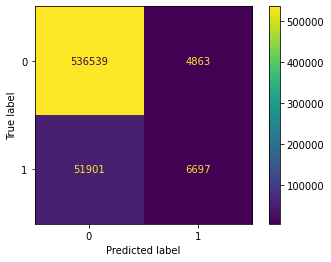

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay

disp= ConfusionMatrixDisplay (confusion_matrix=cm) 
disp.plot() 
plt.show()

In [58]:
from sklearn.metrics import accuracy_score
# Exactitud - La exactitud (accuracy) mide el porcentaje de 
# casos que el modelo ha acertado
accuracy_score(y_test, y_pred)

0.9053933333333334

In [59]:
# Precision - Con la métrica de precisión podemos medir la calidad 
# del modelo de machine learning en tareas de clasificación.
# Responde a la pregunta ¿qué porcentaje de lo identificado como 
# positivo es realmente correcto?
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.5793252595155709

In [60]:
# Recall - ¿Qué porcentaje de los valores positivos fueron bien 
# identificados?
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.11428717703675893

In [61]:
datos_test.shape

(4833292, 10)

#### Predicción de los datos de prueba

In [62]:
prediccion_forest_ = clasificador_forest.predict(datos_test)

In [63]:
prediccion_forest_[1:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Preparamos los datos de test para volcarlo en el archivo de envio

In [64]:
datos_test2 = data_test

In [65]:
datos_test2

uxp_times_bought  uxp_reordered_ratio  u_num_of_orders  \
user_id product_id                                                           
3       248                        1             0.000000               12   
        1005                       1             0.000000               12   
        1819                       3             0.666667               12   
        7503                       1             0.000000               12   
        8021                       1             0.000000               12   
...                              ...                  ...              ...   
206208  48364                      1             0.000000               49   
        48865                      1             0.000000               49   
        49247                      1             0.000000               49   
        49385                      1             0.000000               49   
        49621                      1             0.000000               49   

                    u_avg_prd  dow_most_orders_u  hod_most_orders_u  \
user_id product_id                                                    
3       248          7.333333                  0                 16   
        1005         7.333333                  0                 16   
        1819         7.333333                  0                 16   
        7503         7.333333                  0                 16   
        8021         7.333333                  0                 16   
...                       ...                ...                ...   
206208  48364       13.816327                  2                 15   
        48865       13.816327                  2                 15   
        49247       13.816327                  2                 15   
        49385       13.816327                  2                 15   
        49621       13.816327                  2                 15   

                    prd_count_p  p_reordered_ratio  aisle_id  department_id  
user_id product_id                                                           
3       248                6371           0.400251       117             19  
        1005                463           0.440605        94              7  
        1819               2424           0.492162        88             13  
        7503              12474           0.553551       117             19  
        8021              27864           0.591157        54             17  
...                         ...                ...       ...            ...  
206208  48364             19501           0.530127        83              4  
        48865               802           0.394015       100             21  
        49247              6292           0.654641       120             16  
        49385               318           0.179245        38              1  
        49621              4634           0.643505       112              3  

[4833292 rows x 10 columns]

In [66]:
#Agrego la prediccion como una nueva columna del dataset
datos_test2['prediction'] = prediccion_forest_
datos_test2.head()

uxp_times_bought  uxp_reordered_ratio  u_num_of_orders  \
user_id product_id                                                           
3       248                        1             0.000000               12   
        1005                       1             0.000000               12   
        1819                       3             0.666667               12   
        7503                       1             0.000000               12   
        8021                       1             0.000000               12   

                    u_avg_prd  dow_most_orders_u  hod_most_orders_u  \
user_id product_id                                                    
3       248          7.333333                  0                 16   
        1005         7.333333                  0                 16   
        1819         7.333333                  0                 16   
        7503         7.333333                  0                 16   
        8021         7.333333                  0                 16   

                    prd_count_p  p_reordered_ratio  aisle_id  department_id  \
user_id product_id                                                            
3       248                6371           0.400251       117             19   
        1005                463           0.440605        94              7   
        1819               2424           0.492162        88             13   
        7503              12474           0.553551       117             19   
        8021              27864           0.591157        54             17   

                    prediction  
user_id product_id              
3       248                0.0  
        1005               0.0  
        1819               0.0  
        7503               0.0  
        8021               0.0

In [67]:
# Restablecer el indice
final = datos_test2.reset_index()
# Mantengo solo las columnas requeridas para crear nuestro archivo de envío
final = final[['product_id', 'user_id', 'prediction']]

final.head()

,product_id,user_id,prediction
0,248,3,0.0
1,1005,3,0.0
2,1819,3,0.0
3,7503,3,0.0
4,8021,3,0.0


In [68]:
# Creo el archivo de envio a kaggle
orders = pd.read_csv('../input/orders.csv')
orders_test = orders.loc[orders.eval_set == 'test', ['user_id', 'order_id']]
orders_test.head()

,user_id,order_id
38,3,2774568
44,4,329954
53,6,1528013
96,11,1376945
102,12,1356845


In [69]:
#fusionando nuestra predicción con orders_test
final = final.merge(orders_test, on='user_id', how='left')
final.head()

,product_id,user_id,prediction,order_id
0,248,3,0.0,2774568
1,1005,3,0.0,2774568
2,1819,3,0.0,2774568
3,7503,3,0.0,2774568
4,8021,3,0.0,2774568


In [70]:
#eliminar la columna user_id
final = final.drop('user_id', axis=1)

In [71]:
#convertir product_id en entero
final['product_id'] = final.product_id.astype(int)

## Elimino los df innecesarios
del orders
del orders_test
#gc.collect()

final.head()

,product_id,prediction,order_id
0,248,0.0,2774568
1,1005,0.0,2774568
2,1819,0.0,2774568
3,7503,0.0,2774568
4,8021,0.0,2774568


In [72]:
d = dict()
for row in final.itertuples():
    if row.prediction== 1:
        try:
            d[row.order_id] += ' ' + str(row.product_id)
        except:
            d[row.order_id] = str(row.product_id)

for order in final.order_id:
    if order not in d:
        d[order] = 'None'


#Ahora comprobamos cómo se llenó el diccionario (descomentarizar para ver la salida )
#d

In [73]:

#Convertir el diccionario en un dataframe
sub = pd.DataFrame.from_dict(d, orient='index')

#Restablezco indices
sub.reset_index(inplace=True)
#Establezco los nombres de columnas
sub.columns = ['order_id', 'products']

sub.head()

,order_id,products
0,1376945,8309 14947
1,1416320,21903 24852
2,1735923,17008 35123
3,1980631,6184 22362 46061
4,3202221,9637 39275 45007


In [74]:
sub.to_csv('random-forest-jcv-envio-a-kaggle.csv', index=False)

In [75]:
from IPython.display import FileLink
FileLink('random-forest-jcv-envio-a-kaggle.csv')

d:\Ciencia\Trabajo_Final_Diplomatura_Ciencia_de_Datos_con_Python\random-forest-jcv-envio-a-kaggle.csv

![Archivo enviado a Kaggle](./imagenes/submission-kaggle.png)